In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read pre-processed data 
df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage3.csv")

#show head 
df.head()

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,7-Feb-06,2006,162,2,...,False,False,False,False,False,True,False,False,False,False
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,7-Feb-06,2006,126,7,...,False,False,False,False,False,False,False,False,False,False
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,7-Feb-06,2006,83,18,...,False,False,False,False,False,False,False,False,False,False
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,7-Feb-06,2006,84,4,...,False,False,False,False,False,False,False,False,False,False
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,7-Feb-06,2006,60,3,...,False,False,False,False,True,False,False,False,False,False


### Descriptives 

a) Numeric descriptive statistics

In [4]:
#get description of the data 
df.describe(include='all')


,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
count,572333,572333,572333,572333.000000,572333,572333,572333,572333.000000,572333.000000,572333.000000,...,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,NaN,4599,55,4907,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,937,8412,82707,NaN,68797,78333,981,NaN,NaN,NaN,...,571156,518318,517442,572235,560509,474753,551563,549492,571880,537222
mean,NaN,NaN,NaN,52526.476848,NaN,NaN,NaN,2004.824689,96.625847,8.801560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31533.588428,NaN,NaN,NaN,2.982871,70.744067,43.751445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1994.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,22480.000000,NaN,NaN,NaN,2003.000000,60.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,54112.000000,NaN,NaN,NaN,2005.000000,84.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,83713.000000,NaN,NaN,NaN,2007.000000,102.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


i. Summary of numeric variables 

In [6]:
#get summary of the numeric variables 
df.describe()

,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary,MIS_Status_Binary,IsFranchise,LowDoc_binary,RevLineCr_binary
count,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,5.723330e+05,5.723330e+05,5.723330e+05,5.723330e+05,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000
mean,52526.476848,2004.824689,96.625847,8.801560,1.285879,2.424426,5.958591,1.928716e+05,1.702337e+04,1.785447e+05,1.352192e+05,0.241809,0.183114,0.765161,0.055803,0.074114,0.334014
std,31533.588428,2.982871,70.744067,43.751445,0.453835,13.775755,24.015743,3.094678e+05,7.365140e+04,3.027037e+05,2.487573e+05,0.428179,0.386760,0.423898,0.229541,0.261957,0.471645
min,0.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22480.000000,2003.000000,60.000000,2.000000,1.000000,0.000000,0.000000,3.500000e+04,0.000000e+00,2.500000e+04,1.300000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54112.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,2.000000,8.000000e+04,0.000000e+00,6.000000e+04,3.750000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,83713.000000,2007.000000,102.000000,8.000000,2.000000,2.000000,6.000000,2.000000e+05,0.000000e+00,1.800000e+05,1.275000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,2014.000000,569.000000,8000.000000,2.000000,5085.000000,9500.000000,1.144632e+07,2.223766e+06,5.472000e+06,5.472000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ii. Summary for categorical variables 

In [7]:
#summary of categorical variables 
df.describe(include=[object])

,Name,City,State,Bank,BankState,ApprovalDate,DisbursementDate,BalanceGross
count,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,4599,55,4907,2851,14
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,31-Mar-06,$0.00
freq,937,8412,82707,68797,78333,981,6938,572320


b. Graphical descriptions

i) Histogram for numeric values 


array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'ApprovalFY'}>,
        <Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'NoEmp'}>],
       [<Axes: title={'center': 'NewExist'}>,
        <Axes: title={'center': 'CreateJob'}>,
        <Axes: title={'center': 'RetainedJob'}>,
        <Axes: title={'center': 'DisbursementGross'}>],
       [<Axes: title={'center': 'ChgOffPrinGr'}>,
        <Axes: title={'center': 'GrAppv'}>,
        <Axes: title={'center': 'SBA_Appv'}>,
        <Axes: title={'center': 'ChgOffDate_binary'}>],
       [<Axes: title={'center': 'UrbanRural_binary'}>,
        <Axes: title={'center': 'MIS_Status_Binary'}>,
        <Axes: title={'center': 'IsFranchise'}>,
        <Axes: title={'center': 'LowDoc_binary'}>],
       [<Axes: title={'center': 'RevLineCr_binary'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

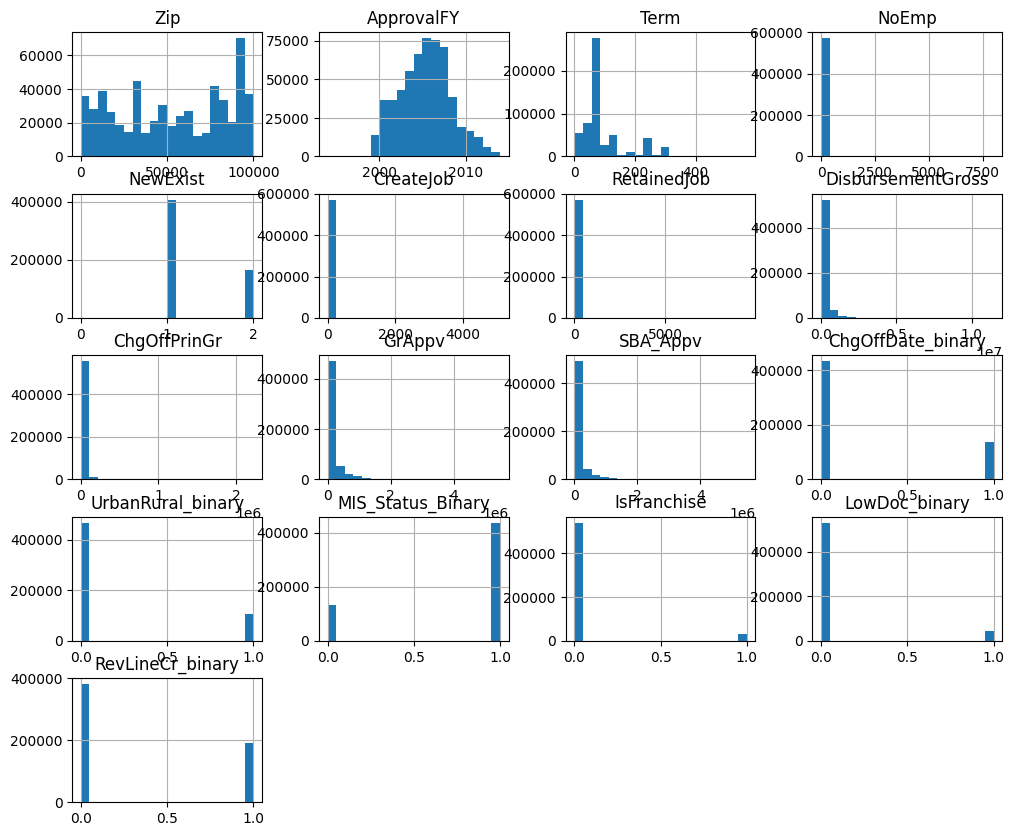

In [8]:
#create a histogram for bumeric variables with bins of 20 
df.hist(figsize=(12, 10), bins=20)

ii. Historgram of Loan approval by year

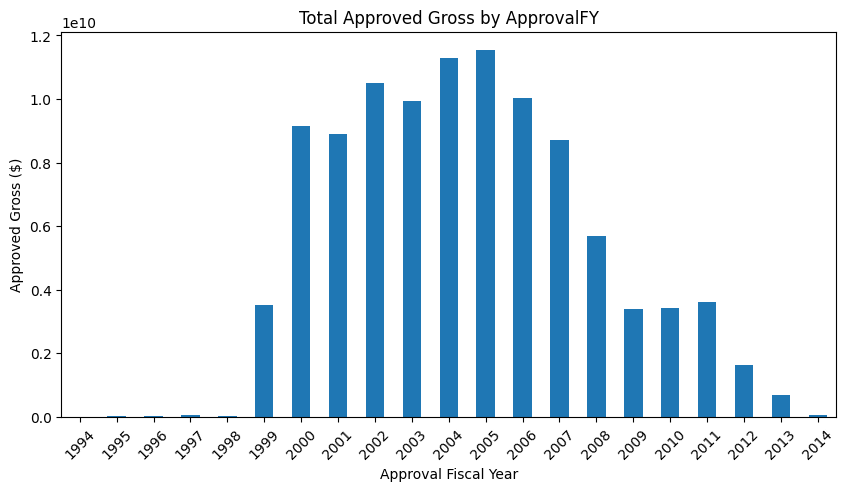

In [11]:
 # Ensure ApprovalFY is numeric
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')

# Drop any NaN values that might have been introduced during conversion
df = df.dropna(subset=['ApprovalFY'])

# Aggregate and plot
df.groupby('ApprovalFY')['GrAppv'].sum().plot(kind='bar', figsize=(10, 5))

plt.xlabel("Approval Fiscal Year")
plt.ylabel("Approved Gross ($)")
plt.title("Total Approved Gross by ApprovalFY")
plt.xticks(rotation=45)
plt.show()

The peak of loan approval was 2005

iii. Histogram of loan disbursement by year

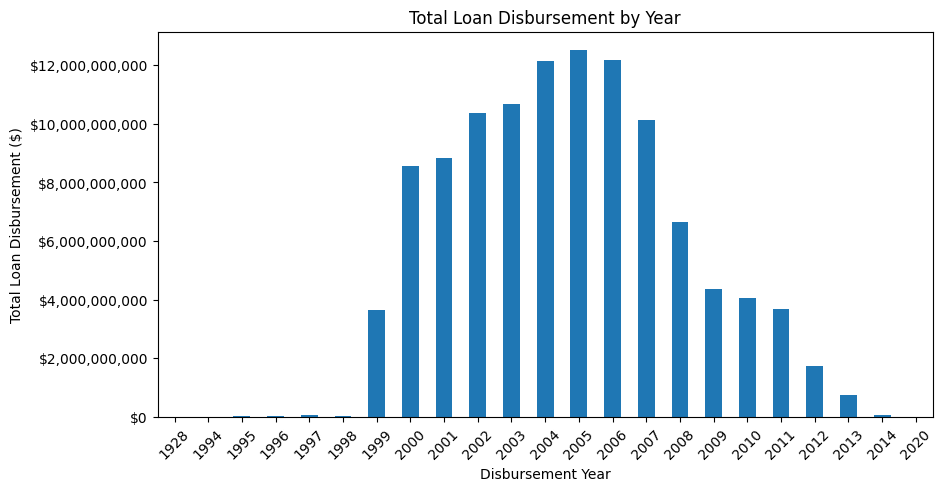

In [12]:
# Extract the last two digits (year) from DisbursementDate and convert to integer
df['DisbursementYear'] = df['DisbursementDate'].str[-2:].astype(int)

# Fix potential century issue: Convert 00-23 to 2000-2023, and 80-99 to 1980-1999
df['DisbursementYear'] = df['DisbursementYear'].apply(lambda x: x + 2000 if x < 24 else x + 1900)

# Aggregate total disbursement by year
yearly_disbursement = df.groupby('DisbursementYear')['DisbursementGross'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
yearly_disbursement.plot(kind='bar', ax=ax)

# Formatting
ax.set_xlabel("Disbursement Year")
ax.set_ylabel("Total Loan Disbursement ($)")
ax.set_title("Total Loan Disbursement by Year")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format as dollars
plt.xticks(rotation=45)

plt.show()

The peak of loan disbursement year was 2005 matching the year that had the highest loan approval 

Box plots for outliers and distributions 

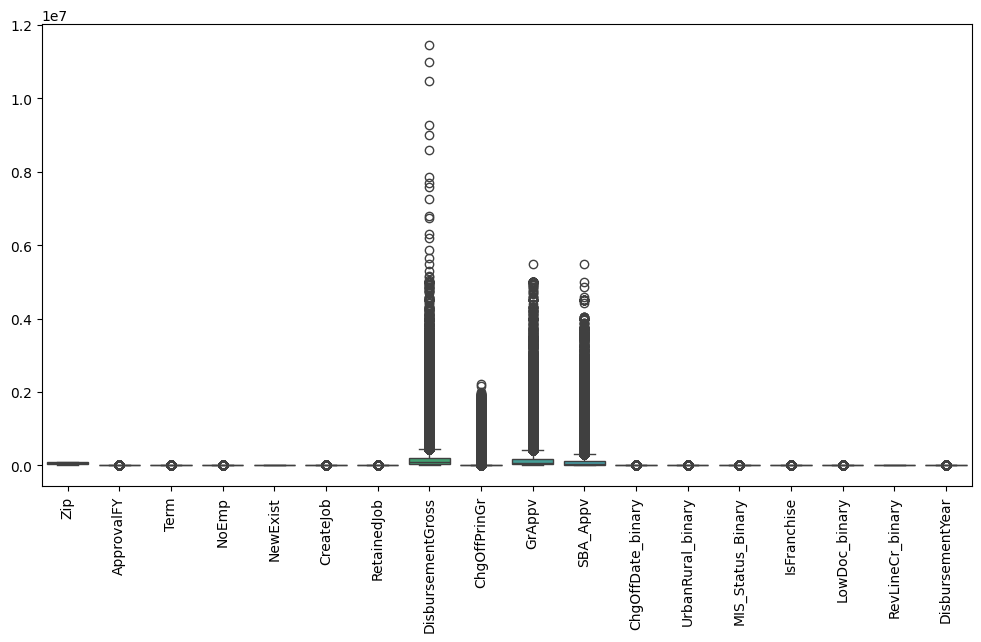

In [17]:
#box plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


Disbursement gross has a six outliers, GrAppc and SBA_appv only have 1 each. The rest of the dataset has no noticeable outliers

Check current columns

In [16]:
#check columns 
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'ChgOffDate_binary', 'UrbanRural_binary',
       'MIS_Status_Binary', 'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
       'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
       'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
       'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
       'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
       'Sector_Mining', 'Sector_Other Services',
       'Sector_Professional Services', 'Sector_Public Admin',
       'Sector_Real Estate', 'Sector_Retail Trade', 'Sector_Transportation',
       'Sector_Unknown', 'Sector_Utilities', 'Sector_Wholesale Trade',
       'DisbursementYear'],
      dtype='object')

### Split data into test and train set 

In [ ]:
#split the data into training, test, and validation set 
from sklearn.model_selection import train_test_split

# MIS_Status_Binary' is the target column
X = df.drop('MIS_Status_Binary', axis=1)  # Features
y = df['MIS_Status_Binary']  # Target variable

# split the data into 80% train+validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# split the train+validation set into 87.5% train and 12.5% validation (to get 70% train and 10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# print the shapes of the splits to verify
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
